In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# a bit of formating to make the plots looking professional
plt.rcParams['text.usetex'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [13,9]
plt.rcParams.update({'figure.autolayout': True})

import data_getters # class to open the datasets
import mpl_examples #  class to plot

# Part I - Learning about the dataset, classification task and simple cut analysis

## A. Learning about the dataset

Firstly, I write my own scripts to start looking at each variable and the differences for each datasets by looking at 1D histograms of the data and various binning size.
To facilitate this ides, I define a function which could apply to each variable. Every time I just need to need call this function and adjust the parameters to show 1D distribution for each variable in four datasets.

In [2]:
def plot_variables(column, x_range, n_bins, x_label, y_label, legend_labels):
    
    fig = plt.figure(figsize=[15.5,6])
    
    axs = []
    
    f_name = ['IBD_off_nonshifted.npy', 'IBD_on_nonshifted.npy', 'IBD_off_shifted.npy', 'IBD_on_shifted.npy']
    
    colors = ['b', 'r', 'g', 'y']
    
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        file = f_name[i]
        data = data_getters.get_data(file)
        ax.hist(x = data[:, column], range = x_range, bins = n_bins, density = False, label = legend_labels[i], color = colors[i])
        
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.grid(True)

        ax.minorticks_on()
        #ax.semilogy()
        ax.legend(loc = 'upper right', prop={'size':11})
        
        ax.set_xlim(x_range)
        axs.append(ax)
        
    return axs

legend_labels = ['IBD_off_nonshifted', 'IBD_on_nonshifted', 'IBD_off_shifted', 'IBD_on_shifted']
y_label = 'a.u.'

### 1. ${delta_{t}~[ns]}$

The first one is for delta_t. As you can see from the picture, its range is from 0 to 400000 (ns). I show it in 200 bins.

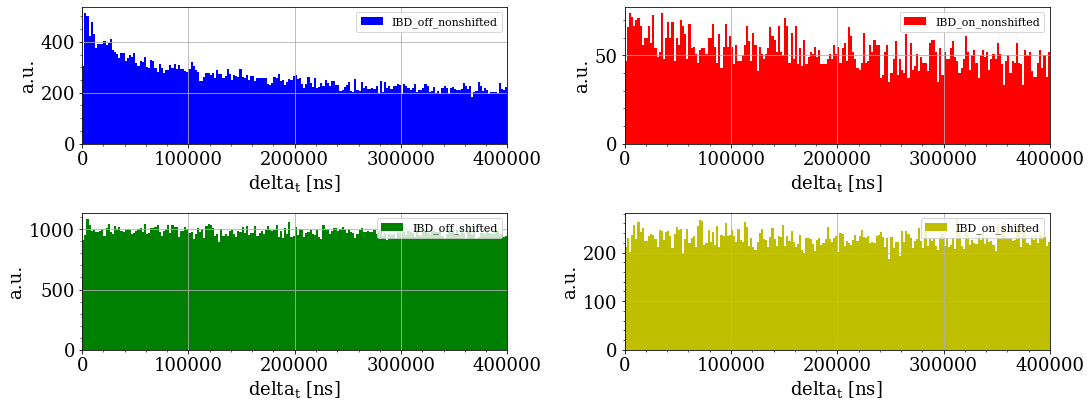

In [3]:
x_label = '$\mathregular{delta_{t}~[ns]}$ '

axs = plot_variables(0, [0,400000], 200, x_label, y_label, legend_labels)

### 2. ${delta_{xy}~[cubes]}$

The second one is for delta_xy. As you can see from the picture, its range is from -1 to 4 (cubes). I show it in 5 bins.

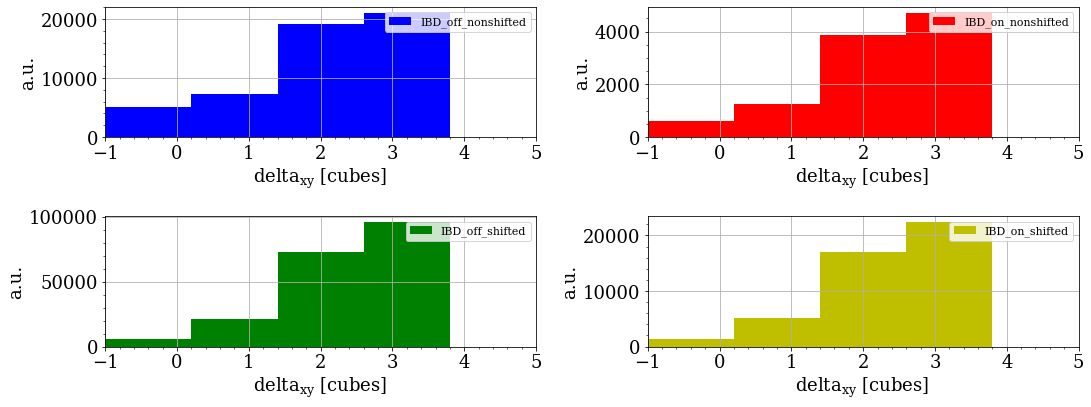

In [4]:
x_label = '$\mathregular{delta_{xy}~[cubes]}$ '

axs = plot_variables(1, [-1,5], 5, x_label, y_label, legend_labels)

### 3. ${delta_{z}~[cubes]}$

The third one is for delta_z. As you can see from the picture, its range is from -3 to 5 (cubes). I show it in 13 bins.

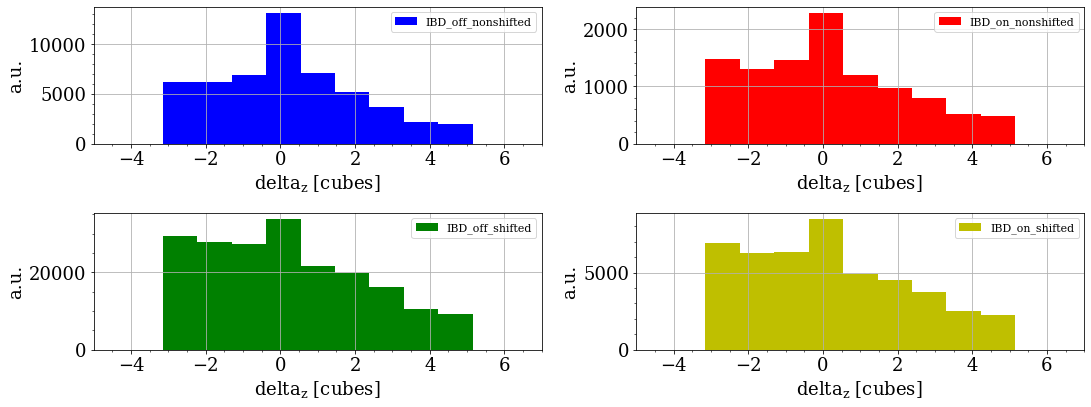

In [5]:
x_label = '$\mathregular{delta_{z}~[cubes]}$ '

axs = plot_variables(2, [-5,7], 13, x_label, y_label, legend_labels)

### 4. ${delta_{r}~[cubes]}$

The forth one is for delta_r. As you can see from the picture, its range is from 0 to 5 (cubes). I show it in 7 bins.

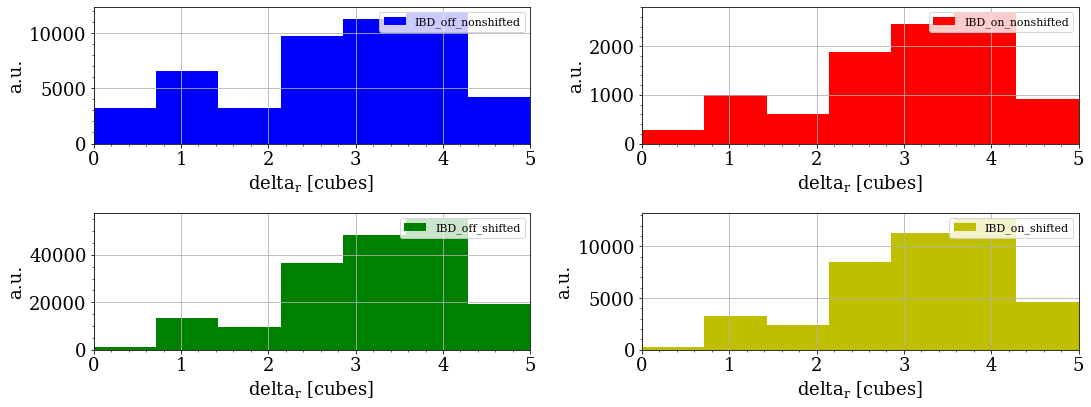

In [6]:
x_label = '$\mathregular{delta_{r}~[cubes]}$ '

axs = plot_variables(3, [0,5], 7, x_label, y_label, legend_labels)

### 5. ${Volume~[cubes]}$

The fifth one is for Volume. As you can see from the picture, its range is from 0 to 5 (cubes). I show it in 6 bins.

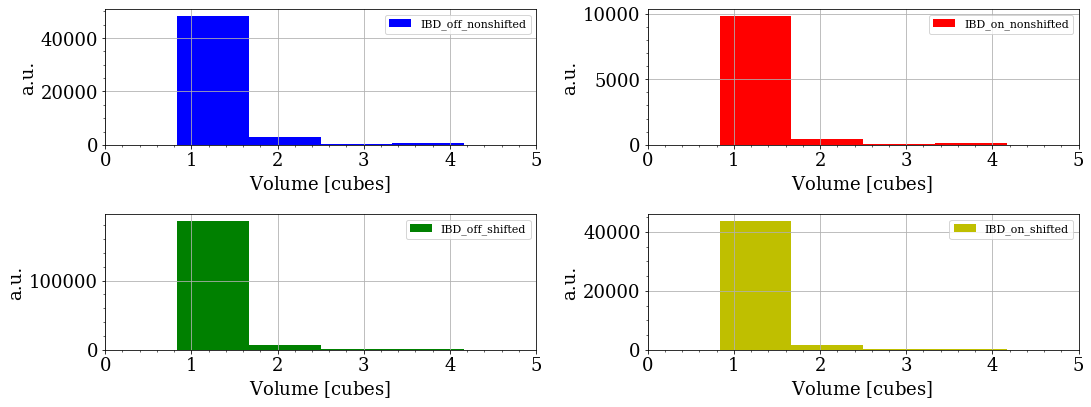

In [7]:
x_label = '$\mathregular{Volume~[cubes]}$ '

axs = plot_variables(4, [0,5], 6, x_label, y_label, legend_labels)

### 6. ${E_{Prompt}~[MeV]}$ 

The sixth one is for prompt energy. As you can see from the picture, its range is from 1 to 10 (MeV). I show it in 200 bins.

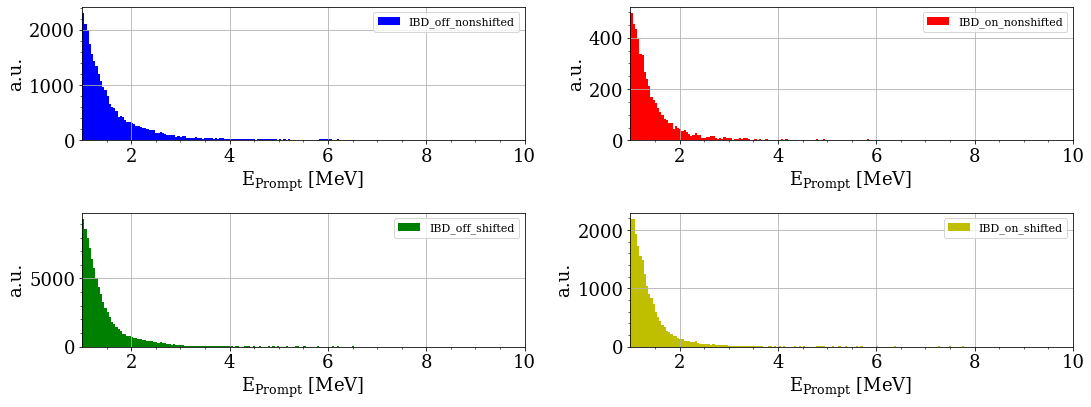

In [8]:
x_label = '$\mathregular{E_{Prompt}~[MeV]}$ '

axs = plot_variables(5, [1,10], 200, x_label, y_label, legend_labels)

## B. Classification Task and Simple Cut Analysis

### 1. Prompt energy

Try to visualise what a simulated sample signal for prompt energy should look like.

TODO


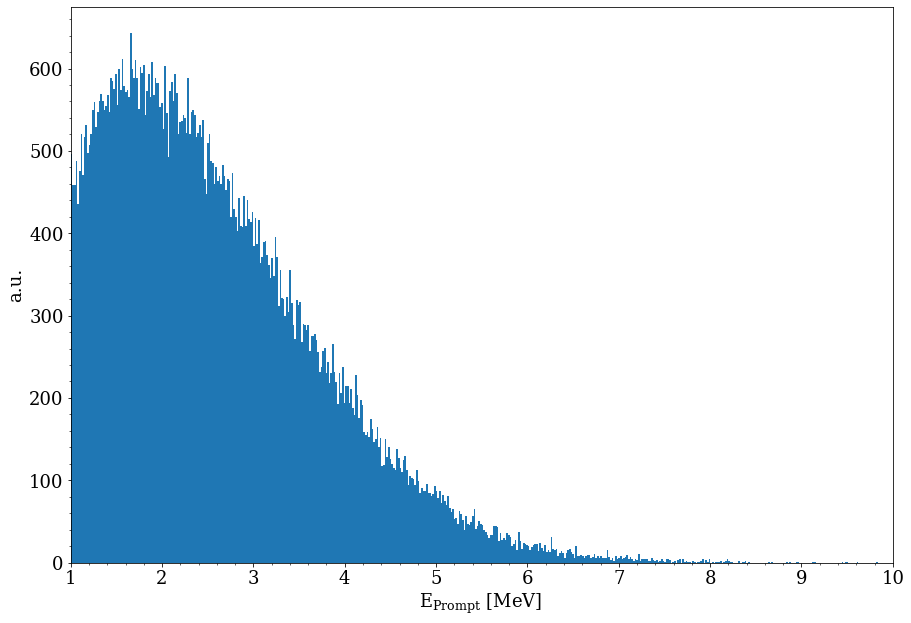

In [9]:
import IBD
f_name = 'IBD_sim_signal_nonshifted.npy'
data = data_getters.get_data(f_name)

x_label = '$\mathregular{E_{Prompt}~[MeV]}$ '
y_label = 'a.u.'

# Plotting now all events from 6th variable in the 2D array between 0 and 10 MeV
ax = mpl_examples.plot_histogram(data[:,5],[1,10], 500, x_label, y_label)

ax.minorticks_on()
#ax.semilogy()

Plot the signal and background for prompt energy together to see if they could be seperated nicely on a selcetion cut.

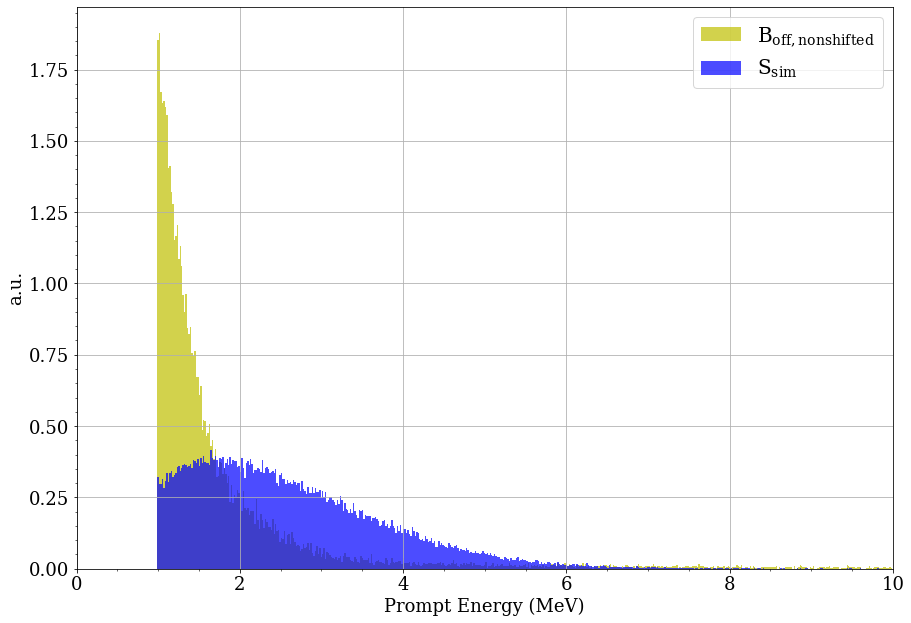

In [10]:
import IBD

fig, ax = plt.subplots() 

data_off_nonshifted = data_getters.get_data('IBD_off_nonshifted.npy')
bins_off_nonshifted, bin_edges = np.histogram(data_off_nonshifted[:, 5], range = [1, 10], bins = 500, density = True)
data_on_sim_signal = data_getters.get_data('IBD_sim_signal_nonshifted.npy')
bins_on_sim, bin_edges = np.histogram(data_on_sim_signal[:, 5], range = [1, 10], bins = 500, density = True)

legend_labels = ['$\mathregular{B_{off, nonshifted}}$', '$\mathregular{S_{sim}}$']
all_bin_heights = [bins_off_nonshifted,  bins_on_sim]
x_range = [0, 10]
x_label = 'Prompt Energy (MeV)'
y_label = 'a.u.'

cols = ['y','b']
xs_prev = np.zeros(len(all_bin_heights[0]))
ax.bar(bin_edges[0:-1],all_bin_heights[0], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[0], facecolor = cols[0], alpha = 0.7)
ax.bar(bin_edges[0:-1],all_bin_heights[1], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[1], facecolor = cols[1], alpha = 0.7)


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend(loc = 'upper right', prop={'size':20})
ax.grid(True)
ax.set_xlim(x_range)

ax.minorticks_on()
#ax.semilogy()

From the plot above, we could see that signal and background overlap with each other. So I try to define a cut value in the range to maximize the number of signals in the reserved region. The metric to optimise is S/sqrt(S+B). For every different cut value, a value for metric could be obtained. Therefore, I got a plot about cut values and metric.

Text(0.5, 1.0, 'Simple Cut Analysis for Prompt Energy')

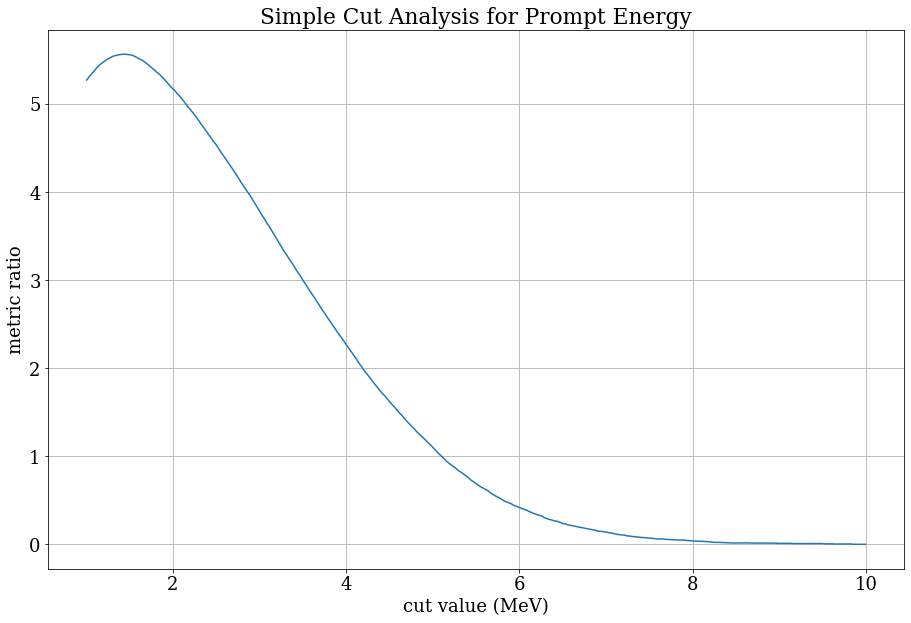

In [11]:
x= 0.5 * (bin_edges[1:] + bin_edges[:-1])

signal = []
background = []

for i in range(len(x)):
    s = sum(bins_on_sim[i:len(x)])
    b = sum(bins_off_nonshifted[i:len(x)])
    signal.append(s)
    background.append(b)

signal =np.array(signal)
background = np.array(background)
sb = signal + background

fraction = signal/np.sqrt(sb)
plt.plot(x, fraction)
plt.xlabel('cut value (MeV)')
plt.ylabel('metric ratio')
plt.grid(True)
plt.title('Simple Cut Analysis for Prompt Energy')

When metric is maximum, the corresponding cut value is what we want. I select the region where prompt energy is bigger than 1.44 Mev, which means the percentage of signal is the largest in this region.


In [12]:
max_index = np.argmax(fraction)
max_number = np.amax(fraction)

cut_value = x[max_index]
print('Cut Value for Prompt Energy: ', cut_value)
print('Cut Index for Prompt Energy: ', max_index)

Cut Value for Prompt Energy:  1.4409999999999998
Cut Index for Prompt Energy:  24


According to the cut value, I calculate the TP, FN, FP, TN. After getting true positive rate and false positive rate, I plot the ROC curve and find the corresponding rate in the plot.

In [13]:
tp = sum(bins_on_sim[max_index:])
fn = sum(bins_on_sim[:max_index])
fp = sum(bins_off_nonshifted[max_index:])
tn = sum(bins_off_nonshifted[:max_index])

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

print('True Positive Rate: ', tpr)
print('False Positive Rate: ', fpr)

True Positive Rate:  0.8549604120403201
False Positive Rate:  0.45646850044365533


In [14]:
# generate a set of TPR and FPR
def get_tpr_fpr_1(n):
    TPR = []
    FPR = []
    for i in range (n):
        tp = sum(bins_on_sim[i:])
        fn = sum(bins_on_sim[:i])
        fp = sum(bins_off_nonshifted[i:])
        tn = sum(bins_off_nonshifted[:i])
        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        TPR.append(tpr)
        FPR.append(fpr)
    return TPR, FPR

# plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

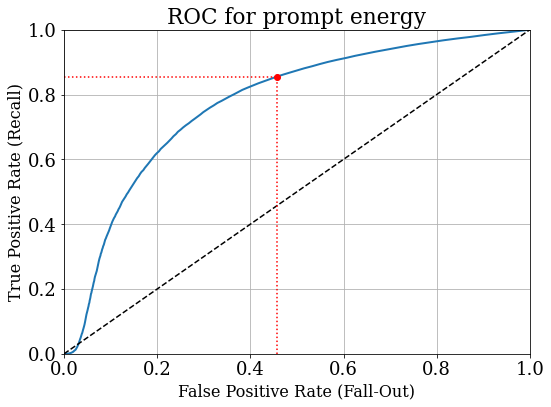

In [15]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(get_tpr_fpr_1(500)[1], get_tpr_fpr_1(500)[0])
plt.plot([fpr, fpr], [0., tpr], "r:")   
plt.plot([0.0, fpr], [tpr, tpr], "r:") 
plt.plot([fpr], [tpr], "ro") 
plt.title('ROC for prompt energy')
plt.show()

This red dot shows a situation which could make TPR as large as possible and make FPR as small as possible simultaneously. From this plot, the true positive rate is about 85.5% which means 85.5% of signals cound be identified as true signals, while the false positive rates shows that 45.6% of backgrounds are mistakenly identified as siganls.

### 2. Delta_t

Try to visualise what a simulated sample signal for delta_t should look like.

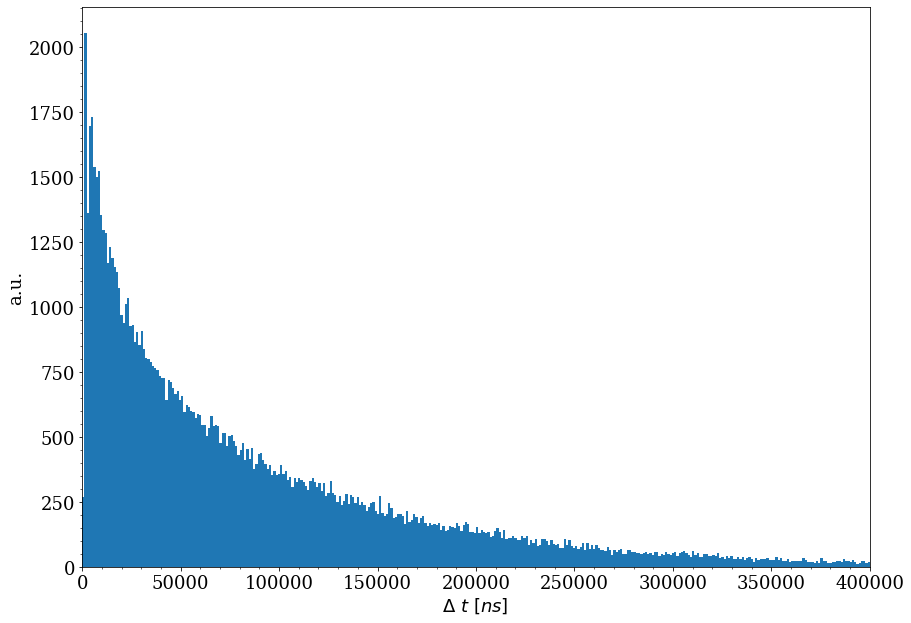

In [16]:
import IBD
f_name = 'IBD_sim_signal_nonshifted.npy'
data = data_getters.get_data(f_name)

x_label = '$\Delta~t~[ns]}$ '
y_label = 'a.u.'

# Plotting now all events from 1st variable in the 2D array between 0 and 10 MeV
ax = mpl_examples.plot_histogram(data[:,0],[0,400000], 350, x_label, y_label)

ax.minorticks_on()
#ax.semilogy()

Plot the signal and background for delta_t together to see if they could be seperated nicely on a selcetion cut.

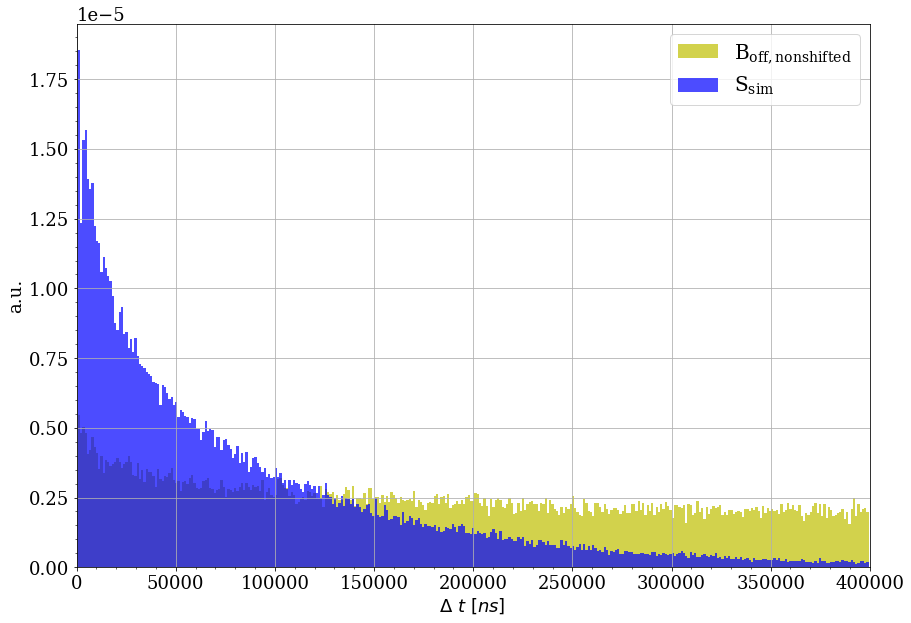

In [17]:
import IBD

fig, ax = plt.subplots() 

data_off_nonshifted = data_getters.get_data('IBD_off_nonshifted.npy')
bins_off_nonshifted, bin_edges = np.histogram(data_off_nonshifted[:, 0], range = [0,400000], bins = 350, density = True)
data_on_sim_signal = data_getters.get_data('IBD_sim_signal_nonshifted.npy')
bins_on_sim, bin_edges = np.histogram(data_on_sim_signal[:, 0], range = [0,400000], bins = 350, density = True)

legend_labels = ['$\mathregular{B_{off, nonshifted}}$', '$\mathregular{S_{sim}}$']
all_bin_heights = [bins_off_nonshifted,  bins_on_sim]
x_range = [0,400000]
x_label = '$\Delta~t~[ns]}$ '
y_label = 'a.u.'

cols = ['y','b']
xs_prev = np.zeros(len(all_bin_heights[0]))
ax.bar(bin_edges[0:-1],all_bin_heights[0], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[0], facecolor = cols[0], alpha = 0.7)
ax.bar(bin_edges[0:-1],all_bin_heights[1], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[1], facecolor = cols[1], alpha = 0.7)


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend(loc = 'upper right', prop={'size':20})
ax.grid(True)
ax.set_xlim(x_range)

ax.minorticks_on()
#ax.semilogy()

What we could see from the plot is that the left part has more signals than the right part. Therefore, I decide to find a cut value to get rid of the left side of it to maximize the metric ratio.

In [18]:
x= 0.5 * (bin_edges[1:] + bin_edges[:-1])
dx = bin_edges[1] - bin_edges[0]
signal = []
background = []

for i in range(len(x)):
    s = sum(bins_on_sim[:i+1])
    b = sum(bins_off_nonshifted[:i+1])
    signal.append(s)
    background.append(b)

signal =np.array(signal)
background = np.array(background)
sb = signal + background

fraction = signal/np.sqrt(sb)

Text(0.5, 1.0, 'Simple Cut Analysis for Delta_t')

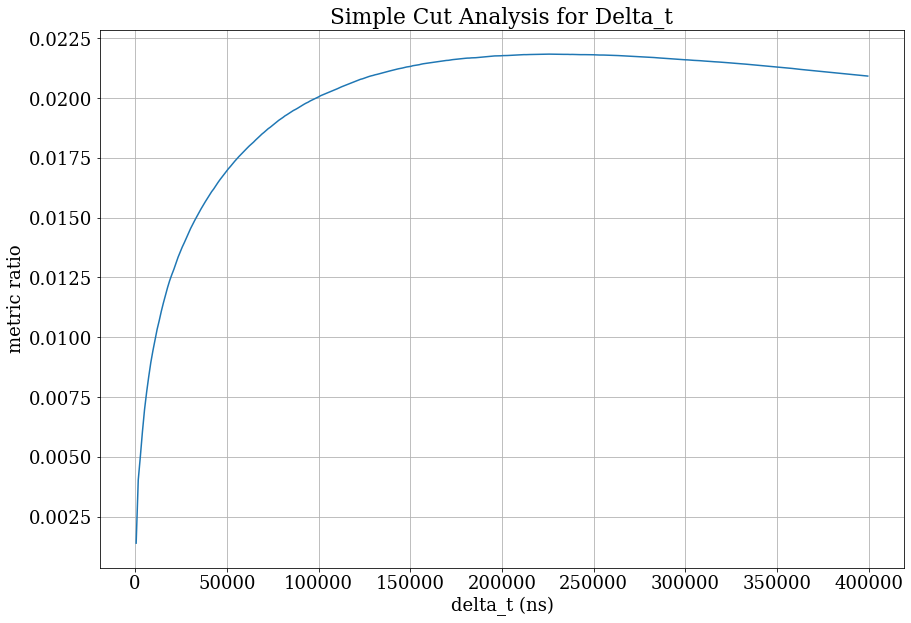

In [19]:
plt.plot(x, fraction)
plt.xlabel('delta_t (ns)')
plt.ylabel('metric ratio')
plt.grid(True)
plt.title('Simple Cut Analysis for Delta_t')

After geting a series values of metric, I plot it for visaulized purpose and find the maximum of it. The corresponding cut value is around 225714 ns.

In [20]:
max_index = np.argmax(fraction)
max_number = np.amax(fraction)

cut_value = x[max_index]
print('Cut Value for Delta_t: ', cut_value)
print('Cut Index for Delta_t: ', max_index)

Cut Value for Delta_t:  225714.28571428574
Cut Index for Delta_t:  197


In [21]:
fn = sum(bins_on_sim[max_index:])
tp = sum(bins_on_sim[:max_index])
tn = sum(bins_off_nonshifted[max_index:])
fp = sum(bins_off_nonshifted[:max_index])

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

print('True Positive Rate: ', tpr)
print('False Positive Rate: ', fpr)

True Positive Rate:  0.9208986999028544
False Positive Rate:  0.635852105313183


In [22]:
def get_tpr_fpr_2(n):
    TPR = []
    FPR = []
    for i in range (n):
        fn = sum(bins_on_sim[i:])
        tp = sum(bins_on_sim[:i])
        tn = sum(bins_off_nonshifted[i:])
        fp = sum(bins_off_nonshifted[:i])
        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        TPR.append(tpr)
        FPR.append(fpr)
    return TPR, FPR

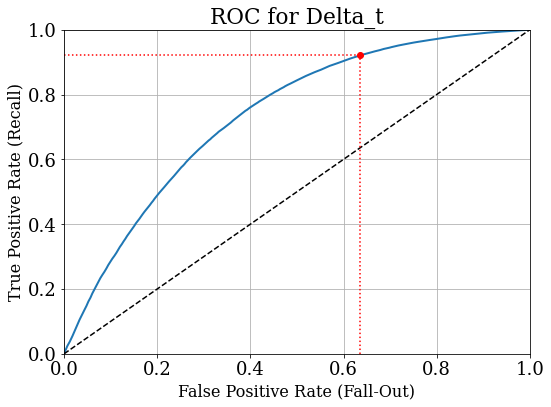

In [23]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(get_tpr_fpr_2(350)[1], get_tpr_fpr_2(350)[0])
plt.plot([fpr, fpr], [0., tpr], "r:")   
plt.plot([0.0, fpr], [tpr, tpr], "r:")  
plt.plot([fpr], [tpr], "ro")   
plt.title('ROC for Delta_t')
plt.show()

From this plot, I can see the true positive rate is quite high which means 92.1% signals are recognised as signals. 63.6% backgounds are mistakenly recognised as signals, this number is also very large and indicates signals and backgrounds are very hard to be seperated even in the selected region.

### 3. Delta_r

Try to visualise what a simulated sample signal for Delta_r should look like.

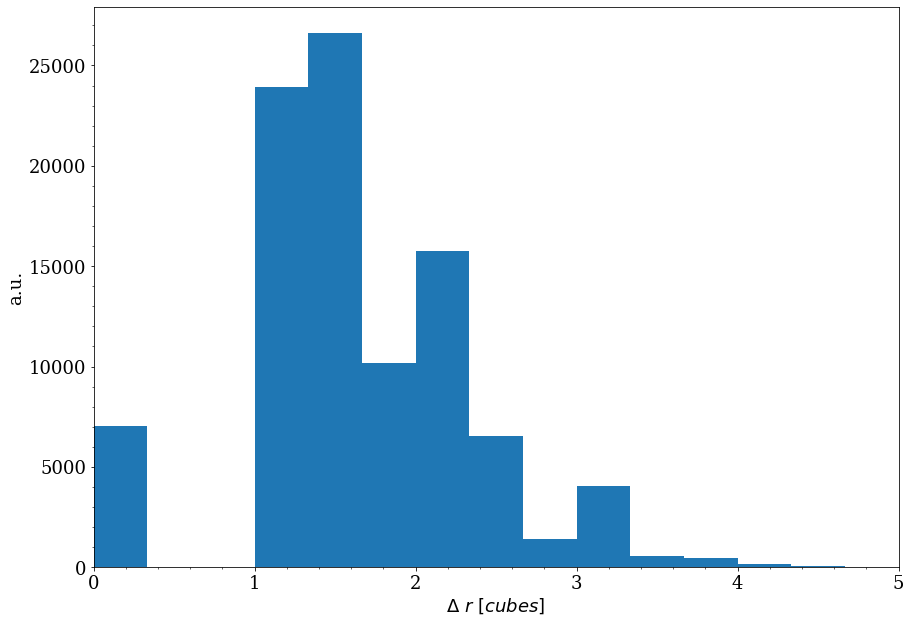

In [24]:
import IBD
f_name = 'IBD_sim_signal_nonshifted.npy'
data = data_getters.get_data(f_name)

x_label = '$\Delta~r~[cubes]}$ '
y_label = 'a.u.'

# Plotting now all events from 6th variable in the 2D array between 0 and 10 MeV
ax = mpl_examples.plot_histogram(data[:,3],[0,5], 15, x_label, y_label)

ax.minorticks_on()
#ax.semilogy()

Plot the signal and background for delta_r together to see if they could be seperated nicely on a selcetion cut.

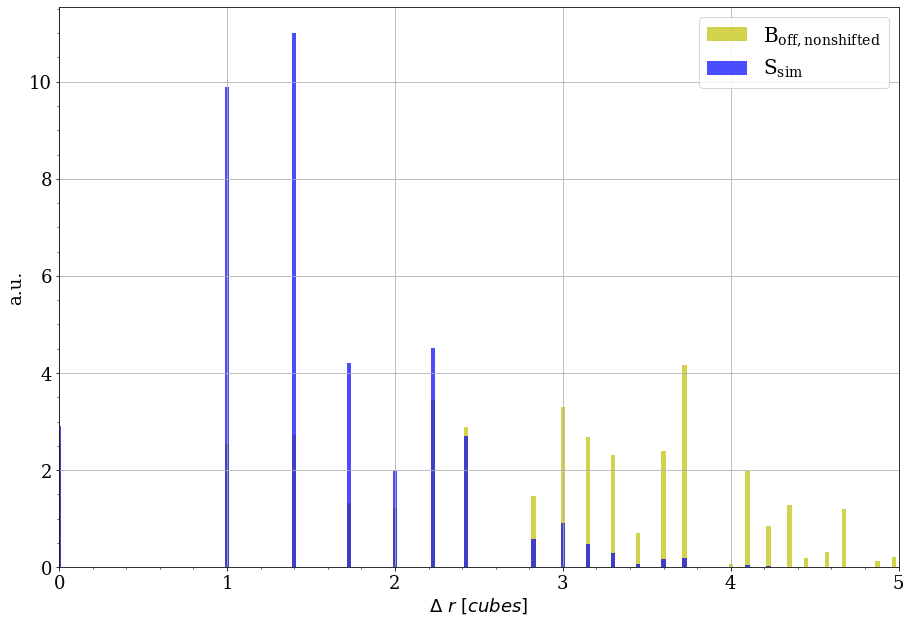

In [25]:
import IBD

fig, ax = plt.subplots() 

data_off_nonshifted = data_getters.get_data('IBD_off_nonshifted.npy')
bins_off_nonshifted, bin_edges = np.histogram(data_off_nonshifted[:, 3], range = [0,5], bins = 200, density = True)
data_on_sim_signal = data_getters.get_data('IBD_sim_signal_nonshifted.npy')
bins_on_sim, bin_edges = np.histogram(data_on_sim_signal[:, 3], range = [0,5], bins = 200, density = True)

legend_labels = ['$\mathregular{B_{off, nonshifted}}$', '$\mathregular{S_{sim}}$']
all_bin_heights = [bins_off_nonshifted,  bins_on_sim]
x_range = [0, 5]
x_label = '$\Delta~r~[cubes]}$ '
y_label = 'a.u.'

cols = ['y','b']
xs_prev = np.zeros(len(all_bin_heights[0]))
ax.bar(bin_edges[0:-1],all_bin_heights[0], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[0], facecolor = cols[0], alpha = 0.7)
ax.bar(bin_edges[0:-1],all_bin_heights[1], bin_edges[1] - bin_edges[0], bottom = xs_prev, label = legend_labels[1], facecolor = cols[1], alpha = 0.7)


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend(loc = 'upper right', prop={'size':20})
ax.grid(True)
ax.set_xlim(x_range)

ax.minorticks_on()
#ax.semilogy()

What we could see from the plot is that the left part has more signals than the right part. Therefore, I decide to find a cut value to get rid of the left side of it to maximize the metric ratio, which is the same idea with what I done for Delta_t.

Text(0.5, 1.0, 'Simple Cut Analysis for Delta_r')

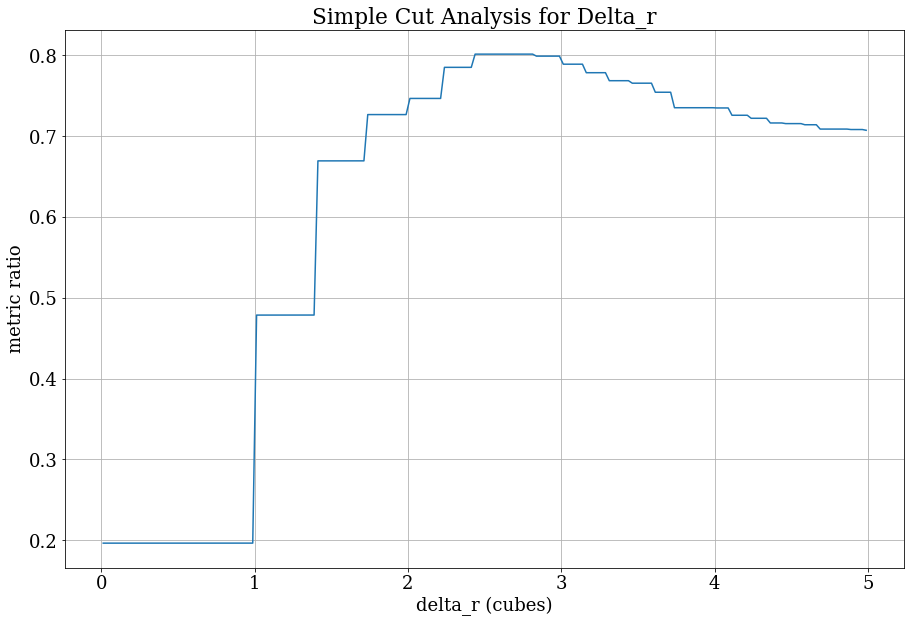

In [26]:
x= 0.5 * (bin_edges[1:] + bin_edges[:-1])
dx = bin_edges[1] - bin_edges[0]

signal = []
background = []

for i in range(len(x)):
    s = dx*sum(bins_on_sim[:i+1])
    b = dx*sum(bins_off_nonshifted[:i+1])
    signal.append(s)
    background.append(b)

signal =np.array(signal)
background = np.array(background)
sb = signal + background

fraction = signal/np.sqrt(sb)
plt.plot(x, fraction)
plt.xlabel('delta_r (cubes)')
plt.ylabel('metric ratio')
plt.grid(True)
plt.title('Simple Cut Analysis for Delta_r')

After geting a series values of metric, I plot it for visaulized purpose and find the maximum of it. The corresponding cut value is around 2.7875 cubes.

In [27]:
max_index = np.argmax(fraction)
max_number = np.amax(fraction)

cut_value = x[max_index]
print('Cut Value for Delta_r: ', cut_value)
print('Cut Index for Delta_r: ', max_index)

Cut Value for Delta_r:  2.7875000000000005
Cut Index for Delta_r:  111


In [28]:
fn = sum(bins_on_sim[max_index:])
tp = sum(bins_on_sim[:max_index])
tn = sum(bins_off_nonshifted[max_index:])
fp = sum(bins_off_nonshifted[:max_index])

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

print('True Positive Rate: ', tpr)
print('False Positive Rate: ', fpr)

True Positive Rate:  0.930341933349872
False Positive Rate:  0.41779083478226087


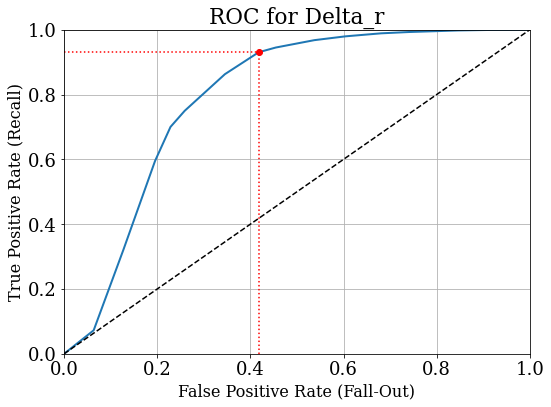

In [29]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(get_tpr_fpr_2(200)[1], get_tpr_fpr_2(200)[0])
plt.plot([fpr, fpr], [0., tpr], "r:")   # Not shown
plt.plot([0.0, fpr], [tpr, tpr], "r:")  # Not shown
plt.plot([fpr], [tpr], "ro")  
plt.title('ROC for Delta_r')
plt.show()

From this plot, I can see the true positive rate is quite high which means 93% signals are recognised as signals. 41.8% backgounds are mistakenly recognised as signals, this number is also very large and indicates signals and backgrounds are very hard to be seperated even in the selected region.

# Part II - Machine learning approach

## 1. construct the training and test sets for signal and background

To start with, I choose signal from 'IBD_sim_signal_nonshifted.npy', because it is the best prediction we have for it using a simulated sample. I choose background from 'IBD_off_nonshifted.npy'. For both signal and background, I only choose three variables in these datasets to construct a new 3D dataset. They are delta_t, delta_r and prompt energy, because these varibales are more easier to seperate signal from background. Then I combine signal and background together to construct the X I want. 

Then I use 1 as the tratget of background and 0 as the target of signal, so I construct y by combining them.

In [30]:
x = data_getters.get_data('IBD_off_nonshifted.npy') # background
y = data_getters.get_data('IBD_sim_signal_nonshifted.npy') #signal 

x1 = x[:, (0, 3, 5)] # choose three varibales: delta_t, delta_r and prompt energy
x2 = y[:, (0, 3, 5)] 
X = np.concatenate((x1, x2), axis=0)

y1 = np.ones(52605, dtype = int) #background
y2 = np.zeros(96762, dtype = int) #signal
y = np.concatenate((y1, y2), axis=0)

Using X and y, I construct a bunch for signal and background, which matches every signal point of X with a target. Therefore, I got a dataset named s_and_b which has similar properties with iris dataset, so it is very convenient to do classification.

In [31]:
from sklearn.utils import Bunch

s_and_b = Bunch(data = X, target = y)

X_new = s_and_b['data']
y_new = s_and_b['target']

And I try to visualize it in a 3D plot to see if it could be seperated nicely.

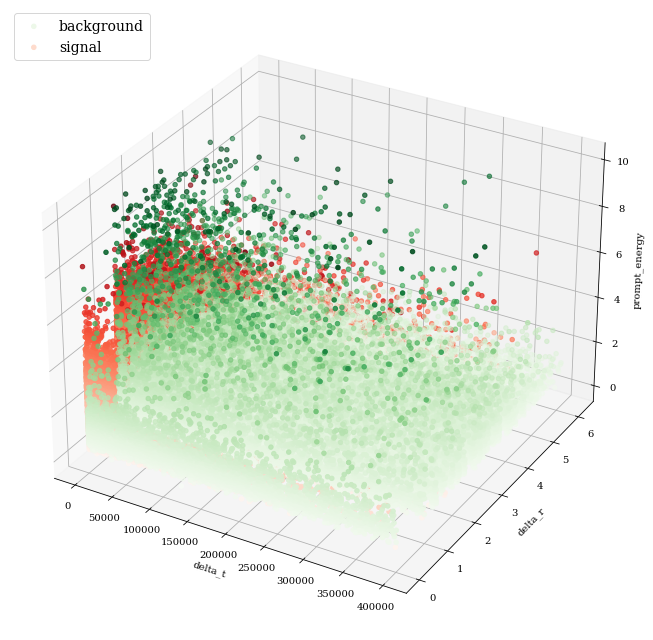

In [32]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [13,9]
plt.rcParams.update({'figure.autolayout': True})

ax = plt.axes(projection='3d')

xdata_b = X_new[:, 0][y_new==1]
ydata_b = X_new[:, 1][y_new==1]
zdata_b = X_new[:, 2][y_new==1]
ax.scatter3D(xdata_b, ydata_b, zdata_b, c=zdata_b, cmap='Greens', label="background" )

xdata_s = X_new[:, 0][y_new==0]
ydata_s = X_new[:, 1][y_new==0]
zdata_s = X_new[:, 2][y_new==0]
ax.scatter3D(xdata_s, ydata_s, zdata_s, c=zdata_s, cmap='Reds', label="signal")

ax.set_xlabel('delta_t')
ax.set_ylabel('delta_r')
ax.set_zlabel('prompt_energy')
ax.legend(loc="upper left", fontsize=14)

From this plot, I could see signals and backgrouds overlap very closely, so it is a little bit difficult for classifiers to work. 

Then I list all classifiers that I want to try.

There are two reasons why I choose Nearest Neighbors. Firstly, I choose it because of its simplicity. Besides, nearest neighbors has been successful in a large number of classification and regression problems. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The reason why I choose Decision Tree is that it requires little data preparation and is simple to understand and to interpret. However, Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. 

The random forest model is considered as a highly accurate and robust method because of the number of decision trees participating in the process. It alos does not suffer from the overfitting problem. However, it is very slow in generating predictions.

The Neural Net model has a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

The AdaBoost model is easy to implement and not prone to overfitting.

The Naive Bayes model is simple and accurate. It can efficiently work on a large dataset. It performs well in case of discrete variable compared to the continuous variable.

The QDA and SGD model is also fast and accurate. They are also very suitbale to apply to large datasets.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "Stochastic Gradient Descent "
]

classifiers = [
    KNeighborsClassifier(5, weights = 'distance'),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
]


X = s_and_b['data']
y = s_and_b['target']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Y = data_getters.get_data('IBD_on_nonshifted.npy')
YY = Y[:, (0, 3, 5)] 

YY represents the dataset 'IBD_on_nonshifted.npy' which has both signals and backgrounds, so I try to apply classifiers that has already been trained to this reactor on data to see if they coud find any signal.

In [40]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pred1 = clf.predict(X_test)
    b1 = np.count_nonzero(pred1)
    s1 = pred1.size - b1
    metric = s1/(s1+b1)
    pred2 = clf.predict(YY)
    b = np.count_nonzero(pred2)
    s = pred2.size - b
    print('\nUsing the ' + name + ' model')
    print('the metric ratio is: ', metric)
    print('the accuracy is: ', accuracy_score(y_test, pred1) )
    print('The number of backgrounds in Reactor on Data: ', b)
    print('The number of signals in Reactor on Data: ',s)


Using the Nearest Neighbors model
the metric ratio is:  0.6804579232777667
the accuracy is:  0.8385887393720292
The number of backgrounds in Reactor on Data:  10423
The number of signals in Reactor on Data:  38

Using the Decision Tree model
the metric ratio is:  0.7084421235857267
the accuracy is:  0.8590078328981723
The number of backgrounds in Reactor on Data:  9019
The number of signals in Reactor on Data:  1442

Using the Random Forest model
the metric ratio is:  0.7136975296244226
the accuracy is:  0.8616522728794269
The number of backgrounds in Reactor on Data:  3509
The number of signals in Reactor on Data:  6952

Using the Neural Net model
the metric ratio is:  0.692475061926759
the accuracy is:  0.8634598647653478
The number of backgrounds in Reactor on Data:  10461
The number of signals in Reactor on Data:  0

Using the AdaBoost model
the metric ratio is:  0.7028854522327107
the accuracy is:  0.8611501640222267
The number of backgrounds in Reactor on Data:  10191
The number

From this results, I could tell that all these machine learning models has a good accuracy. These values are all around 0.85, which means they all perform quite well on these datasets. Among them, the Neural Net model has the best accuracy, which is around 0.864.

However, the Random Forest model has the best metric ratio, so I suppose it could find the most accurate number of signals, which is about 702 signals and 9759 backgrounds.

Then I try to plot different roc curves for differnt classifiers. However, some of classifiers could not get y_scores using method 'decision_function', so they could not have the roc curve.

##### 1.ROC curve for SGDClassifier

In [41]:
y_train_s = (y_train == 0) 
y_test_s = (y_test == 0)

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) #max_iterint:The maximum number of passes over the training data
sgd_clf.fit(X_train, y_train_s)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_s, cv= 10, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_s, y_scores)

plt.figure(figsize=(8, 6))                                    

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

##### 2.ROC curve for AdaBoostClassifier

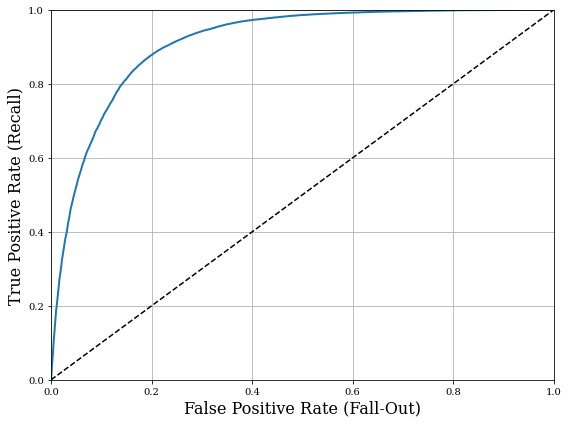

In [36]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train_s)

y_scores = cross_val_predict(clf, X_train, y_train_s, cv= 10, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_s, y_scores)

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)

##### 3.ROC curve for QuadraticDiscriminantAnalysis

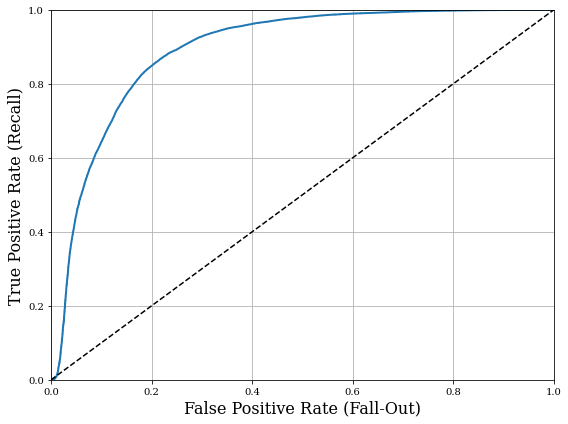

In [37]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train_s)

y_scores = cross_val_predict(clf, X_train, y_train_s, cv= 10, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_s, y_scores)

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)

Finally, I try to plot the descision boundary for delta_t and prompt energy. Clearly, the performance is not very good.

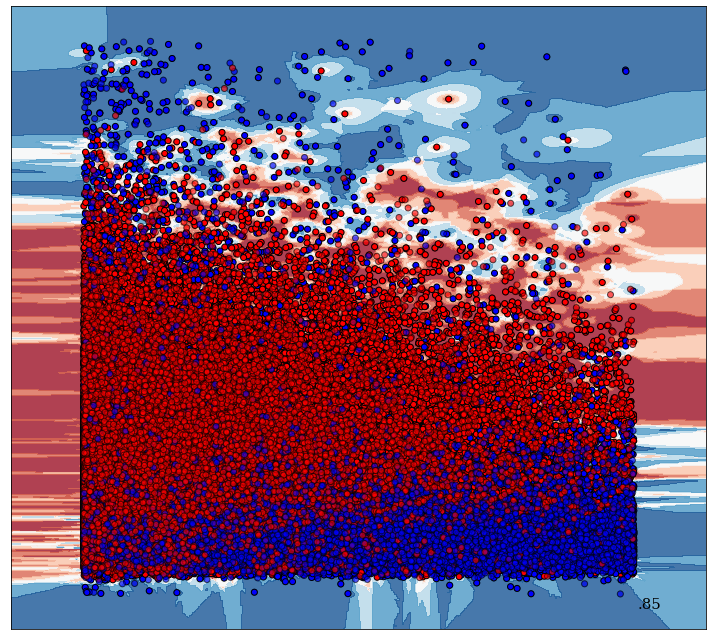

In [42]:
h = 0.01

from matplotlib.colors import ListedColormap
figure = plt.figure(figsize=(10, 9))

X = s_and_b['data'][:,(0,2)]
y = s_and_b['target']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = KNeighborsClassifier(5, weights = 'distance')
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, 1, 1)
    
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
        
ax.text(xx.max() - 0.3,yy.min() + 0.3,("%.2f" % score).lstrip("0"),size=15,horizontalalignment="right")


plt.tight_layout()
plt.show()